## **Day1-Task: Linear Regression** 
In this task were are going to create a simple **Linear Regression** Model to predict scores of students based on number of hours they have studied.

## Importing Required Libraries

In [ ]:
# libraries required to perform this task
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Loading the dataset

In [ ]:
URL = 'http://bit.ly/w-data' # url for dataset
df = pd.read_csv(URL) # reading dataset directly from url of csv
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.describe() # this describes dataset using measures like min, max, mean, std, etc

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting Dataset

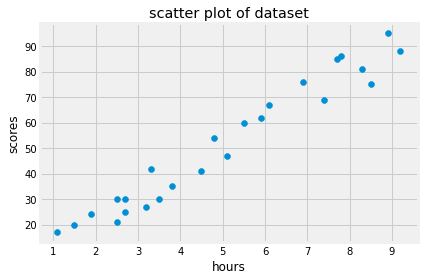

In [ ]:
# scatter plot of dataset
x = df['Hours']
y = df['Scores']
plt.scatter(x, y)
plt.title('scatter plot of dataset')
plt.ylabel('scores')
plt.xlabel('hours')
plt.tight_layout()

## Modelling

In [ ]:
X = df.iloc[:, :-1].values   # this is our independent variable that will be used to predict scores
y = df.iloc[:, 1].values   # this is our dependent variable that our model will predict

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)  # splitting the dataset for training and validation

In [ ]:
model = LinearRegression()

In [ ]:
# training our model
model.fit(X_train, y_train)

LinearRegression()

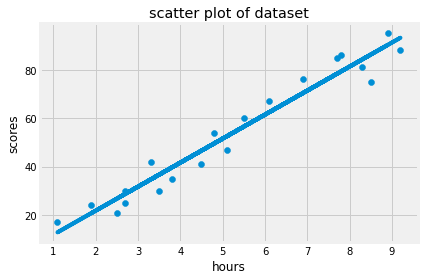

In [ ]:
x = df['Hours']
y = df['Scores']
plt.scatter(X_train.squeeze(1), y_train)
plt.title('scatter plot of dataset')
plt.ylabel('scores')
plt.xlabel('hours')
plt.plot(X_train.squeeze(1), model.predict(X_train))
plt.tight_layout()

The above plot describes the prediction of model where blue lines corresponds to models predictions and dots are actual values from the dataset.

## Validating

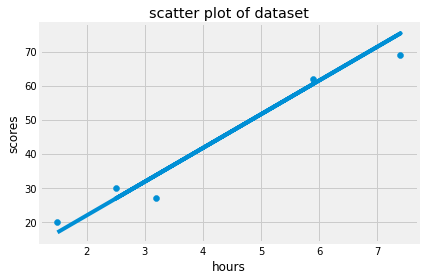

In [ ]:
x = df['Hours']
y = df['Scores']
plt.scatter(X_test.squeeze(1), y_test)
plt.title('scatter plot of dataset')
plt.ylabel('scores')
plt.xlabel('hours')
plt.plot(X_test.squeeze(1), model.predict(X_test))
plt.tight_layout()

In [ ]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be the score for 9.25 hours ?

In [ ]:
data = np.array([[9.25]])
preds = model.predict(data)
print(f'score for 9.25 hours of study will be {preds}')

score for 9.25 hours of study will be [93.69173249]


## Model evaluation

In [ ]:
loss = mean_squared_error(y_test, y_pred)
print(f'our models validation Mean Squared Error Loss is {loss}')

our models validation Mean Squared Error Loss is 21.598769307217456


In [ ]:
loss = mean_absolute_error(y_test, y_pred)
print(f'our models validation Mean Absolute Error Loss is {loss}')

our models validation Mean Absolute Error Loss is 4.183859899002982
